In [ ]:
!pip install kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rollov","key":"6cd57d0a043c018341ff5e0c9c5f2817"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c test-recsys

 98% 134M/137M [00:01<00:00, 53.0MB/s]
100% 137M/137M [00:01<00:00, 81.4MB/s]
 99% 95.0M/96.2M [00:01<00:00, 50.0MB/s]
100% 96.2M/96.2M [00:01<00:00, 58.6MB/s]
 97% 105M/108M [00:02<00:00, 46.5MB/s] 
100% 108M/108M [00:02<00:00, 53.6MB/s]
 99% 121M/123M [00:02<00:00, 49.2MB/s]
100% 123M/123M [00:02<00:00, 57.9MB/s]
 89% 97.0M/109M [00:02<00:00, 23.8MB/s]
100% 109M/109M [00:02<00:00, 43.6MB/s] 
 79% 95.0M/120M [00:02<00:01, 21.8MB/s]
100% 120M/120M [00:02<00:00, 51.8MB/s] 
 80% 89.0M/111M [00:02<00:00, 28.8MB/s]
100% 111M/111M [00:02<00:00, 53.5MB/s] 
100% 150M/150M [00:02<00:00, 74.1MB/s]
100% 150M/150M [00:02<00:00, 76.0MB/s]
 92% 132M/144M [00:01<00:00, 124MB/s]
100% 144M/144M [00:01<00:00, 134MB/s]
 93% 145M/156M [00:02<00:00, 69.8MB/s]
100% 156M/156M [00:02<00:00, 68.4MB/s]
 80% 9.00M/11.2M [00:00<00:00, 24.7MB/s]
100% 11.2M/11.2M [00:00<00:00, 28.2MB/s]
 36% 9.00M/24.8M [00:00<00:00, 24.0MB/s]
100% 24.8M/24.8M [00:00<00:00, 55.9MB/s]
 95% 56.0M/59.0M [00:00<00:00, 45.0MB/s]
100% 5

In [13]:
from zipfile import ZipFile

file_name = "sample_submission.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
import os, fnmatch

tab_2_array = fnmatch.filter(os.listdir('.'), 'tab_2*')

k = 1
for tab_2 in tab_2_array:
  with ZipFile(tab_2, 'r') as zip:
    zip.extractall()
    print(f'Left: ' + str(len(tab_2_array) - k))
    k += 1


Left: 25
Left: 24
Left: 23
Left: 22
Left: 21
Left: 20
Left: 19
Left: 18
Left: 17
Left: 16
Left: 15
Left: 14
Left: 13
Left: 12
Left: 11
Left: 10
Left: 9
Left: 8
Left: 7
Left: 6
Left: 5
Left: 4
Left: 3
Left: 2
Left: 1
Left: 0


In [ ]:
import pandas as pd
import numpy as np

TAB_1_ORDERS

In [ ]:
tab_1_orders = pd.read_csv('/content/tab_1_orders.csv')
tab_6_city = pd.read_csv('/content/tab_6_city.csv')
tab_1_orders = tab_1_orders.merge(tab_6_city, left_on='store_id', right_on='store_id')
tab_1_orders.shape

(2461958, 7)

In [ ]:
tab_1_orders.head()

,user_id,order_id,order_created_time,retailer,store_id,platform,city_name
0,72,17431000,2020-09-26 10:48:57,METRO,21,app,Москва
1,1474,10066159,2020-05-14 17:35:58,METRO,21,app,Москва
2,1474,10083198,2020-05-15 04:40:50,METRO,21,app,Москва
3,1474,15090928,2020-08-16 09:32:13,METRO,21,app,Москва
4,2657,7652238,2020-03-29 19:44:24,METRO,21,app,Москва


TAB_3_CATEGORIES

In [ ]:
tab_3_categories = pd.read_csv('/content/tab_3_categories.csv')
tab_3_categories.shape

(1016, 3)

In [ ]:
tab_3_categories[tab_3_categories['id'] == 575]

,id,name,parent_id
574,575,Соль,9


In [ ]:
tab_3_categories.parent_id.nunique()

140

In [ ]:
tab_3_categories

,id,name,parent_id
0,1,Продукты питания,0
1,2,Замороженные продукты,1
2,3,Замороженные овощи и фрукты,2
3,4,Замороженные полуфабрикаты,2
4,5,Рыба замороженная,2
...,...,...,...
1011,1012,Перевязочные материалы,571
1012,1013,Расходные материалы,571
1013,1014,Диагностические тесты,571
1014,1015,Диагностические приборы,571


In [ ]:
tab_3_categories[tab_3_categories['parent_id'] == 9]

,id,name,parent_id
9,10,"Хлопья, мюсли, сухие завтраки",9
10,11,Макароны,9
11,12,Крупы,9
12,13,Диабетическое питание,9
13,14,"Мука, дрожжи, добавки",9
14,15,Растительные масла,9
15,16,Маринады и уксус,9
16,17,"Сахар, соль",9
17,18,"Сухарики, чипсы, снеки",9
573,574,Сахар и сахарозаменители,9


TAB_4_USER_PROFILES

In [ ]:
tab_4_user_profiles = pd.read_csv('/content/tab_4_user_profiles.csv')
tab_4_user_profiles.shape

(438867, 3)

In [ ]:
tab_4_user_profiles.head()

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN
3,2224895,NaN,NaN
4,930197,NaN,NaN


TAB_5_PRODUCT_PROPERTIES

In [ ]:
tab_5_product_properties = pd.read_csv('/content/tab_5_product_properties.csv')
tab_5_product_properties.shape

(6990208, 3)

In [ ]:
tab_5_product_properties[tab_5_product_properties['product_id'] == 21612]

,product_id,property_name,property_value
179317,21612,Вид соли,Каменная
179318,21612,Условия хранения,В сухом прохладном месте
179319,21612,Вид помола,Мелкий
179320,21612,Выработка,Самосадочная
179321,21612,Вес,1 кг
179322,21612,Вид упаковки,Пластиковый пакет
179323,21612,Срок хранения,24 мес
179324,21612,Тип продукта,Соль поваренная
179325,21612,Состав,Соль поваренная пищевая


TAB_2_PRODUCTS

In [ ]:
tab_2_products = pd.read_csv('/content/tab_2_products_2020-01-01.csv')
tab_2_products.shape

(303667, 11)

In [ ]:
tab_2_products['master_category_id'].max()

1013.0

In [ ]:
tab_1_orders

,user_id,order_id,order_created_time,retailer,store_id,platform,city_name
0,72,17431000,2020-09-26 10:48:57,METRO,21,app,Москва
1,1474,10066159,2020-05-14 17:35:58,METRO,21,app,Москва
2,1474,10083198,2020-05-15 04:40:50,METRO,21,app,Москва
3,1474,15090928,2020-08-16 09:32:13,METRO,21,app,Москва
4,2657,7652238,2020-03-29 19:44:24,METRO,21,app,Москва
...,...,...,...,...,...,...,...
2461953,3383197,17826259,2020-10-01 14:22:41,fissman,809,undefined,Москва
2461954,3383198,17826253,2020-10-01 14:22:38,fissman,810,undefined,Москва
2461955,3383199,17826297,2020-10-01 14:23:13,fissman,812,undefined,Москва
2461956,3383200,17826292,2020-10-01 14:23:09,fissman,814,undefined,Москва


In [ ]:
import datetime

tab_1_orders['order_created_time'] = tab_1_orders['order_created_time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
tab_1_orders.user_id.nunique()

753572

In [ ]:
tab_2_products.groupby(['user_id'])['product_id'].count().sort_values()

user_id
693691      1
479035      1
473829      1
719162      1
702954      1
         ... 
222648    165
724561    168
264965    182
308975    225
129053    239
Name: product_id, Length: 10580, dtype: int64

In [ ]:
tab_2_products[tab_2_products['user_id'] == 129053]

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
41094,129053,5549752,28546533,9.670000,20,0.000000,Соль Славяна пищевая самосадочная 1 кг,21612,Славяна,575.0,9
41095,129053,5549752,28552147,83.000000,10,0.000000,Отбеливатель-пятновыводитель Бос Плюс Maximum,8181,Бос,250.0,243
41096,129053,5549752,28552210,114.900002,1,70.099998,Кондиционер для белья Lenor Parfumelle Жемчужн...,62476,Lenor,249.0,243
41097,129053,5549752,28552242,765.000000,1,0.000000,Гель для стирки Ласка Эффект восстановления дл...,8306,Ласка,247.0,243
41098,129053,5549752,28552245,765.000000,1,0.000000,Гель для стирки Ласка Эффект восстановления дл...,8305,Ласка,247.0,243
...,...,...,...,...,...,...,...,...,...,...,...
41328,129053,5626771,29217494,52.990002,1,0.000000,Лаваш Коломенский Армянский тонкий,13478,Коломенский,596.0,51
41329,129053,5626771,29217607,125.000000,1,0.000000,Горчица Heinz Французская 180 г,13930,Heinz,587.0,479
41330,129053,5626771,29217639,73.889999,2,18.000000,Сметана Простоквашино 25 % 315 г бзмж,39595,Простоквашино,29.0,20
41331,129053,5626771,29218228,115.000000,1,0.000000,Лимонная кислота Haas,64834,Haas,578.0,9


In [ ]:
tab_1_orders.sort_values(by='order_created_time')

,user_id,order_id,order_created_time,retailer,store_id,platform,city_name
732299,691783,5531326,2019-12-31 21:29:17,METRO,105,app,Самара
223398,1780472,5531329,2019-12-31 21:34:24,Ашан,185,web,Москва
922306,746811,5531332,2019-12-31 21:35:41,METRO,107,app,Волгоград
58249,38519,5531345,2019-12-31 22:15:31,METRO,3,web,Москва
157310,204195,5531349,2019-12-31 22:19:25,METRO,10,app,Москва
...,...,...,...,...,...,...,...
1675244,3387396,17843206,2020-10-01 20:57:01,METRO,91,web,Ростов-на-Дону
1694260,1257943,17843217,2020-10-01 20:57:34,METRO,126,app,Пермь
45657,3204913,17843224,2020-10-01 20:57:54,METRO,320,app,Московская Область
780358,3387406,17843230,2020-10-01 20:58:01,Лента,301,app,Грозный


In [ ]:
tab_1_orders['order_created_time'].max() - tab_1_orders['order_created_time'].min()

Timedelta('274 days 23:29:54')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
tab_1_orders.user_id.nunique()

753572

In [ ]:
tab_1_orders

,user_id,order_id,order_created_time,retailer,store_id,platform,city_name
0,72,17431000,2020-09-26 10:48:57,METRO,21,app,Москва
1,1474,10066159,2020-05-14 17:35:58,METRO,21,app,Москва
2,1474,10083198,2020-05-15 04:40:50,METRO,21,app,Москва
3,1474,15090928,2020-08-16 09:32:13,METRO,21,app,Москва
4,2657,7652238,2020-03-29 19:44:24,METRO,21,app,Москва
...,...,...,...,...,...,...,...
2461953,3383197,17826259,2020-10-01 14:22:41,fissman,809,undefined,Москва
2461954,3383198,17826253,2020-10-01 14:22:38,fissman,810,undefined,Москва
2461955,3383199,17826297,2020-10-01 14:23:13,fissman,812,undefined,Москва
2461956,3383200,17826292,2020-10-01 14:23:09,fissman,814,undefined,Москва


In [ ]:
import tqdm
import os 
import fnmatch

tab_2 = fnmatch.filter(os.listdir('.'), 'tab_2*.csv')
# q = pd.read_csv(tab_2[0])

res = {}

for file_name in tqdm.tqdm(tab_2):
  key = file_name.split('_')[-1].split('.')[0]
  frame = pd.read_csv(file_name)

  unique = frame.user_id.unique()
  res[key] = unique

100%|██████████| 26/26 [03:02<00:00,  7.00s/it]


In [ ]:
res

In [ ]:
matrix = np.zeros((len(res), len(res)))

for i, key1 in enumerate(res.keys()):
  for j, key2 in enumerate(res.keys()):
    key1_users = res[key1]
    key2_users = res[key2]
    intersect_qty = np.intersect1d(key1_users, key2_users).shape[0]

    matrix[i][j] = intersect_qty


In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, xticklabels=res.keys(), yticklabels=res.keys())

In [ ]:
tab_2_products

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
0,525,5354800,28381452,116.000000,4,0.000000,Лазанья Золотой Петушок мясной слоеный пирог з...,37548,Золотой Петушок,101.0,99
1,525,5354800,29242911,56.990002,2,13.080000,Хлеб Хлебный Дом Геркулес зерновой с отрубями ...,5636,Хлебный Дом,596.0,51
2,525,5354800,29242919,64.989998,2,40.020000,Тортилья Delicados оригинальная пшеничная,22107,Delicados,596.0,51
3,525,5354800,29243785,44.990002,6,0.000000,Вода питьевая минеральная BonAqua газированная...,2530,BonAqua,77.0,74
4,525,5354800,29244246,65.900002,6,30.990000,"Газированный напиток Mirinda Апельсин 1,5 л",3818486,Mirinda,76.0,74
...,...,...,...,...,...,...,...,...,...,...,...
303662,725964,5652846,29327078,52.639999,2,23.780001,Черная смородина Fine life быстрозамороженная,94654,Fine Life,592.0,90
303663,725964,5652846,29327108,29.459999,1,39.400002,Помидоры черри красные 250 г,687,Без бренда,85.0,84
303664,725964,5652846,29327109,29.480000,1,29.580000,Помидоры черри сливовидные 250 г,4830888,Без бренда,85.0,84
303665,725964,5652846,29327192,83.220001,1,21.209999,Сыр Bonfesto Моцарелла mini 45% 100 г бзмж,26739,Bonfesto,38.0,35


In [ ]:
# total_items = {}

# for file_name in tqdm.tqdm(tab_2):
#   key = file_name.split('_')[-1].split('.')[0]
#   frame = pd.read_csv(file_name)

sorted(tab_2)

['tab_2_products_2020-01-01.csv',
 'tab_2_products_2020-01-11.csv',
 'tab_2_products_2020-01-21.csv',
 'tab_2_products_2020-01-31.csv',
 'tab_2_products_2020-02-10.csv',
 'tab_2_products_2020-02-20.csv',
 'tab_2_products_2020-03-01.csv',
 'tab_2_products_2020-03-11.csv',
 'tab_2_products_2020-03-21.csv',
 'tab_2_products_2020-03-31.csv',
 'tab_2_products_2020-04-10.csv',
 'tab_2_products_2020-04-20.csv',
 'tab_2_products_2020-04-30.csv',
 'tab_2_products_2020-05-10.csv',
 'tab_2_products_2020-05-20.csv',
 'tab_2_products_2020-05-30.csv',
 'tab_2_products_2020-06-09.csv',
 'tab_2_products_2020-06-19.csv',
 'tab_2_products_2020-06-29.csv',
 'tab_2_products_2020-07-09.csv',
 'tab_2_products_2020-07-19.csv',
 'tab_2_products_2020-07-29.csv',
 'tab_2_products_2020-08-08.csv',
 'tab_2_products_2020-08-18.csv',
 'tab_2_products_2020-08-28.csv',
 'tab_2_products_2020-09-07.csv']

In [ ]:
one_last_month = [
    'tab_2_products_2020-08-28.csv',
    'tab_2_products_2020-09-07.csv'         
]

three_last_months = [
    'tab_2_products_2020-06-09.csv',
    'tab_2_products_2020-06-19.csv',
    'tab_2_products_2020-06-29.csv',
    'tab_2_products_2020-07-09.csv',
    'tab_2_products_2020-07-19.csv',
    'tab_2_products_2020-07-29.csv',
    'tab_2_products_2020-08-08.csv',
    'tab_2_products_2020-08-18.csv',
    'tab_2_products_2020-08-28.csv',
    'tab_2_products_2020-09-07.csv' 
]

six_last_months = [
    'tab_2_products_2020-03-01.csv',
    'tab_2_products_2020-03-11.csv',
    'tab_2_products_2020-03-21.csv',
    'tab_2_products_2020-03-31.csv',
    'tab_2_products_2020-04-10.csv',
    'tab_2_products_2020-04-20.csv',
    'tab_2_products_2020-04-30.csv',
    'tab_2_products_2020-05-10.csv',
    'tab_2_products_2020-05-20.csv',
    'tab_2_products_2020-05-30.csv',
    'tab_2_products_2020-06-09.csv',
    'tab_2_products_2020-06-19.csv',
    'tab_2_products_2020-06-29.csv',
    'tab_2_products_2020-07-09.csv',
    'tab_2_products_2020-07-19.csv',
    'tab_2_products_2020-07-29.csv',
    'tab_2_products_2020-08-08.csv',
    'tab_2_products_2020-08-18.csv',
    'tab_2_products_2020-08-28.csv',
    'tab_2_products_2020-09-07.csv'
]

In [ ]:
from collections import Counter

x = pd.read_csv(one_last_month[0])
y = pd.read_csv(one_last_month[1])

con = pd.concat([x, y])

In [ ]:
september = Counter(con['product_id'].values)

In [ ]:
# x['product_id'].value_counts().sort_values(ascending=False).head(50)

sept_frame = con[con['product_id'] != 0]['product_id'].value_counts().sort_values(ascending=False).head(50).to_frame().reset_index().rename(columns={'product_id': 'count', 'index': 'id'})


In [ ]:
t = ' '.join(str(x) for x in sept_frame.id.values.tolist())
t.split(' ')

['709',
 '39590',
 '166',
 '158',
 '180',
 '100',
 '14564',
 '67694',
 '10095',
 '6685882',
 '1300',
 '7325382',
 '73725',
 '176',
 '68465',
 '5469728',
 '3497419',
 '7397',
 '70763',
 '77405',
 '66893',
 '49911',
 '63072',
 '72011',
 '55133',
 '6782754',
 '3817484',
 '57291',
 '72875',
 '21904',
 '21757',
 '24836',
 '5481688',
 '6805305',
 '36067',
 '57292',
 '96306',
 '24835',
 '6749608',
 '17314',
 '2271',
 '7401',
 '71049',
 '77094',
 '57621',
 '1746',
 '49921',
 '26335',
 '72003',
 '55134']

In [ ]:
submit = pd.read_csv('sample_submission.csv')

In [ ]:
submit

,Id,Predicted
0,51,3239211 10720024 8493844 1965540 5009002 95218...
1,65,11693356 13392267 2464515 2245175 4748570 1134...
2,766,12773054 3692749 12726751 10041624 11893515 23...
3,1132,8613934 3599065 575614 4821474 11609320 699047...
4,1578,289404 4328240 3129788 9390886 11166655 173077...
...,...,...
107063,2997849,488280 12804927 11495685 10630957 10105977 123...
107064,2997853,8793937 4387315 2889577 12818088 5845044 33833...
107065,2997873,13062625 4299544 6891932 6790047 5060191 19574...
107066,2997988,450088 7429186 2128096 12142139 4530043 425405...


In [ ]:
x[['user_id', 'product_id']]

for file_name in three_last_months:
  frame = pd.read_csv(file_name)[['user_id', 'product_id']]

,user_id,product_id
0,65,201286
1,65,105764
2,65,26062
3,65,3302524
4,65,54728
...,...,...
3167950,3142966,71049
3167951,3142966,96217
3167952,3142966,94125
3167953,3142966,4235874


In [ ]:
submission = pd.read_csv('submission_3_month(2).csv')

In [ ]:
submission

,user_id,answer_list
0,51,14863 19562 63057 3562687 709 9979 456 661 550...
1,65,54728 18450 3817542 709 18439 26062 105764 771...
2,187,88084 88086
3,400,0 813 94333 3817507 177 407 26751 55034 57085 ...
4,576,177 2600 102 4443 5628 10002 10757 14007 46469...
...,...,...
107063,3142760,225 452 1985 5154 5601 6567 6757 8333 12817 13...
107064,3142766,104 60546 7365485 7343959 5045132 5044874 3826...
107065,3142774,14616 21868 201892 1159915 1159916 4033462 504...
107066,3142820,0 72614 4277211 4277111 4277109 85340 80212 78...


In [ ]:
qwe = submit.merge(submission, left_on='Id', right_on='user_id', how='left')

qwe['answer_array'] = qwe['answer_list'].apply(lambda x: np.nan if pd.isnull(x) else x.split(' '))

NameError: ignored

In [ ]:
qwe

NameError: ignored

In [ ]:
frame_fill = qwe[(pd.isnull(qwe['answer_list'])) | (qwe['answer_array'].str.len() < 50)]
indexes_raw = frame_fill.index
# frame_fill.loc[2, 'answer_array']
clear_frame = qwe[~qwe.index.isin(indexes_raw)]
frame_fill

,Id,Predicted,user_id,answer_list,answer_array
77,22664,4814617 4833363 4356962 7495483 3901927 558120...,22664,199645 1087 14465 61768 36269,"[199645, 1087, 14465, 61768, 36269]"
84,23639,8036691 120654 12968452 13094332 2158562 45249...,23639,2519 64231 1300 8271 0 8187 27872 77785 49911 ...,"[2519, 64231, 1300, 8271, 0, 8187, 27872, 7778..."
85,23762,6131561 11930233 7903528 12267239 13473349 912...,23762,10015 2575 20581 20582 20583 27629 64588 69177...,"[10015, 2575, 20581, 20582, 20583, 27629, 6458..."
116,31070,5229403 1003181 11877836 2481659 10557029 1134...,31070,1300 57609 2575 5061792 0 1049 17963 21612 547...,"[1300, 57609, 2575, 5061792, 0, 1049, 17963, 2..."
118,31604,9829210 9544519 13232104 4286052 11735679 1110...,31604,5479458 101031 4142091 4830899 65317 50190 573...,"[5479458, 101031, 4142091, 4830899, 65317, 501..."
...,...,...,...,...,...
107063,2997849,488280 12804927 11495685 10630957 10105977 123...,2997849,93412 94112,"[93412, 94112]"
107064,2997853,8793937 4387315 2889577 12818088 5845044 33833...,2997853,60692 72283 5481655 5478327 5075712 5061499 38...,"[60692, 72283, 5481655, 5478327, 5075712, 5061..."
107065,2997873,13062625 4299544 6891932 6790047 5060191 19574...,2997873,8016 14248 14341 24851 27745 30361 46762 60116...,"[8016, 14248, 14341, 24851, 27745, 30361, 4676..."
107066,2997988,450088 7429186 2128096 12142139 4530043 425405...,2997988,100 6692211 7008784 7008408 7000939 6749608 67...,"[100, 6692211, 7008784, 7008408, 7000939, 6749..."


In [ ]:
# def transform_value(x_line, y_line):

#   to_submit = x_line
#   check = y_line

#   if isinstance(to_submit, list):
#     a1 = check.split(' ')
#     a2 = to_submit

#     add = 50 - len(a2)
#     diff = list(set(a1) - set(a2))

#     return diff[:add] + a2

#   else:
#     return 0  

# frame_fill['length'] = np.vectorize(transform_value)(frame_fill['answer_array'], frame_fill['Predicted'])

In [ ]:
z3 = clear_frame.copy()
z3['Predicted'] = z3['answer_array'].apply(lambda x: ' '.join(x))

res = pd.concat([z3[['Id', 'Predicted']], frame_fill[['Id', 'Predicted']]])

In [ ]:
res

,Id,Predicted
0,51,14863 19562 63057 3562687 709 9979 456 661 550...
1,65,54728 18450 3817542 709 18439 26062 105764 771...
2,766,3043457 3041849 0 3042629 4033676 3497419 981 ...
3,1132,95465 2629 9970 91008 2599278 1199 1583 2165 2...
4,1578,22161 19924 304 4513 45457 4689 19562 69131 25...
...,...,...
107063,2997849,488280 12804927 11495685 10630957 10105977 123...
107064,2997853,8793937 4387315 2889577 12818088 5845044 33833...
107065,2997873,13062625 4299544 6891932 6790047 5060191 19574...
107066,2997988,450088 7429186 2128096 12142139 4530043 425405...


In [ ]:
res.to_csv('subbmit.csv', index=False)

In [ ]:
x1 = clear_frame[['Id', 'Predicted']]
x2 = frame_fill[['Id', 'Predicted']]

,Id,Predicted,user_id,answer_list,answer_array
0,51,3239211 10720024 8493844 1965540 5009002 95218...,51.0,709 14863 63057 655 2600 16420 19562 3562687 3...,"[709, 14863, 63057, 655, 2600, 16420, 19562, 3..."
1,65,11693356 13392267 2464515 2245175 4748570 1134...,65.0,54728 3817542 18439 18450 26062 709 105764 771...,"[54728, 3817542, 18439, 18450, 26062, 709, 105..."
3,1132,8613934 3599065 575614 4821474 11609320 699047...,1132.0,91008 95465 2599278 49915 1199 2165 2543 2629 ...,"[91008, 95465, 2599278, 49915, 1199, 2165, 254..."
4,1578,289404 4328240 3129788 9390886 11166655 173077...,1578.0,22161 19924 45457 39492 69131 304 25524 4513 4...,"[22161, 19924, 45457, 39492, 69131, 304, 25524..."
5,2129,747076 7166172 47956 11049756 4756107 6826104 ...,2129.0,24873 27629 8868 24851 27569 29556 84085 96236...,"[24873, 27629, 8868, 24851, 27569, 29556, 8408..."
...,...,...,...,...,...
106989,2994042,5180556 2316076 6898204 7764877 10602651 83859...,2994042.0,29612 285 287 292 2575 4979 4991 5109 5110 511...,"[29612, 285, 287, 292, 2575, 4979, 4991, 5109,..."
107009,2995156,8695907 12129829 5333736 8090075 7655367 31540...,2995156.0,456 1786 6137 7640 8309 15373 15375 17314 2314...,"[456, 1786, 6137, 7640, 8309, 15373, 15375, 17..."
107033,2996506,2778084 13357612 5056425 2745664 8804006 73709...,2996506.0,0 100 166 1242 1985 7732 9590 15374 23139 2314...,"[0, 100, 166, 1242, 1985, 7732, 9590, 15374, 2..."
107047,2996911,9695104 10650959 5488612 6091539 12375597 1172...,2996911.0,0 51 177 1764 6614 9849 14925 18711 20100 2614...,"[0, 51, 177, 1764, 6614, 9849, 14925, 18711, 2..."


In [14]:
import tqdm
import pandas as pd
import numpy as np
import os 
import fnmatch

tab_2 = fnmatch.filter(os.listdir('.'), 'tab_2*.csv')
# q = pd.read_csv(tab_2[0])

# res = {}

# for file_name in tqdm.tqdm(tab_2):
#   key = file_name.split('_')[-1].split('.')[0]
#   frame = pd.read_csv(file_name)

#   unique = frame.user_id.unique()
#   res[key] = unique

In [15]:
submit = pd.read_csv('sample_submission.csv')

In [16]:
unique_id = submit.Id.unique()

In [17]:
from tqdm import tqdm

res_concat = []

for file in tqdm(tab_2):
  x = pd.read_csv(file)[['user_id', 'product_id']]
  filter_frame = x[x['user_id'].isin(unique_id)]
  res_concat.append(filter_frame)

100%|██████████| 26/26 [02:32<00:00,  5.87s/it]


In [18]:
import pickle

with open('res_concat.pickle', 'wb') as f:
  pickle.dump(res_concat, f)

In [19]:
xx = pd.concat(res_concat)

In [20]:
xxx = xx.groupby(['user_id'])['product_id'].value_counts()

In [21]:
asd = xxx.to_frame().rename(columns={'product_id': 'count_id'}).reset_index()
asd

,user_id,product_id,count_id
0,51,14863,16
1,51,19562,13
2,51,63057,13
3,51,3562687,12
4,51,709,11
...,...,...,...
15124316,3142875,5044950,1
15124317,3142875,5044951,1
15124318,3142875,5075130,1
15124319,3142875,5075131,1


In [22]:
largest = asd.groupby(['user_id'])['product_id', 'count_id'].apply(pd.DataFrame.nlargest, n=50, columns=['count_id']).reset_index().drop(columns={'level_1'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [23]:
largest

,user_id,product_id,count_id
0,51,14863,16
1,51,19562,13
2,51,63057,13
3,51,3562687,12
4,51,709,11
...,...,...,...
4489766,3142875,5044950,1
4489767,3142875,5044951,1
4489768,3142875,5075130,1
4489769,3142875,5075131,1


In [24]:
category_dict = largest[['user_id', 'product_id']].groupby(['user_id'])['product_id'].apply(list).to_dict()

In [25]:
len(category_dict.keys())

107068

In [26]:
category = {key: str(value) for key, value in category_dict.items()}

In [27]:
matrix = []

for key, value in tqdm(category.items()):
  row = [key, value]
  matrix.append(row)

100%|██████████| 107068/107068 [00:00<00:00, 1347851.28it/s]


In [28]:
import pickle

# with open('data.pickle', 'wb') as f:
#   pickle.dump(matrix, f)

# with open('data.pickle', 'rb') as f:
#   matrix = pickle.load(f)

FileNotFoundError: ignored

In [48]:
import pandas as pd
import numpy as np
from ast import literal_eval

q = pd.DataFrame(matrix).rename(columns={0: 'Id', 1: 'Predicted'})

In [49]:
from ast import literal_eval

q['length'] = q['Predicted'].apply(lambda x: len(literal_eval(x)))

In [50]:
most_popular = largest.groupby(['product_id'])['count_id'].sum().to_frame().reset_index().sort_values(by='count_id', ascending=False).product_id.values

In [51]:
clear = q[q['length'] == 50]
clear_index = clear.index
raw = q[~q.index.isin(clear_index)]

In [52]:
most_popular.shape

(73554,)

In [53]:
raw.shape

(35054, 3)

In [54]:
import collections

class OrderedSet(collections.Set):
    def __init__(self, iterable=()):
        self.d = collections.OrderedDict.fromkeys(iterable)

    def __len__(self):
        return len(self.d)

    def __contains__(self, element):
        return element in self.d

    def __iter__(self):
        return iter(self.d)


In [59]:
from tqdm import tqdm_notebook

total_pred = []

for index, row in tqdm_notebook(raw.iterrows()):
  length = row['length']
  left = 50 - length
  predicted = literal_eval(row.Predicted)

  diff = list(OrderedSet(most_popular) - OrderedSet(predicted))
  res_diff = diff[:left]
  current_pred = predicted + res_diff
  total_pred.append(current_pred)

  # for value in most_popular:
  #   if value not in predicted and len(predicted) != 50:
  #     predicted.append(value)

  # total_pred.append(predicted)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [61]:
raw_frame = pd.concat(total_pred)

TypeError: ignored

In [64]:
raw['Predcited'] = [str(x) for x in total_pred]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
raw_columns = raw[['Id', 'Predcited']].rename(columns={'Predcited': 'Predicted'})

In [71]:
# total_total = pd.concat(clear[['Id', 'Predicted'], raw_columns])
clear_col = clear[['Id', 'Predicted']]

In [80]:
clear_col

,Id,Predicted
0,51,"[14863, 19562, 63057, 3562687, 709, 9979, 456,..."
1,65,"[54728, 18450, 3817542, 709, 18439, 26062, 105..."
3,400,"[0, 813, 94333, 3817507, 177, 407, 26751, 5503..."
4,576,"[177, 2600, 102, 4443, 5628, 10002, 10757, 140..."
5,608,"[9611, 55641, 5470984, 7342615, 4424, 4443, 51..."
...,...,...
106929,3137586,"[166, 285, 1504, 2084, 6347, 6367, 6368, 9945,..."
106941,3137890,"[105, 166, 7090, 9397, 10163, 14303, 17809, 19..."
106969,3139005,"[80020, 80021, 877, 1749, 1822, 1823, 2482, 97..."
107030,3141664,"[60876, 6388051, 175, 6622, 6777, 7979, 7988, ..."


In [79]:
raw_columns

,Id,Predicted
2,187,"[88084, 88086, 0, 709, 39590, 166, 55133, 1300..."
10,1221,"[2578, 9959, 58032, 4276318, 196879, 58812, 42..."
11,1474,"[37433, 31277, 105, 90812, 36666, 3039043, 145..."
13,1626,"[6622, 1766, 15593, 17647, 25838, 4592637, 639..."
19,2682,"[4431, 45458, 7042872, 7032787, 57219, 57561, ..."
...,...,...
107062,3142704,"[18028, 30339, 5469408, 5061047, 3497419, 3497..."
107064,3142766,"[104, 60546, 7365485, 7343959, 5045132, 504487..."
107065,3142774,"[14616, 21868, 201892, 1159915, 1159916, 40334..."
107066,3142820,"[0, 72614, 4277211, 4277111, 4277109, 85340, 8..."


In [84]:
from ast import literal_eval

res_res = pd.concat([clear_col, raw_columns])
res_res['Predicted'] = res_res['Predicted'].apply(lambda x: ' '.join([str(i) for i in literal_eval(x)]))

In [86]:
res_res.to_csv('qweqwe.csv', index=False)

In [ ]:
a = [1, 3, 5, 6]
b = [2, 1, 5, 7, 4]

# b - a

# [2, 7, 4]

In [ ]:

print(list(OrderedSet(b) - OrderedSet(a)))

[2, 7, 4]


Validation

In [88]:
from tqdm import tqdm
import os 
import pandas as pd
import numpy as np
import fnmatch

tab_2 = sorted(fnmatch.filter(os.listdir('.'), 'tab_2*.csv'))
submit_example = pd.read_csv('sample_submission.csv')

In [89]:
submit_user_id = submit_example.Id.unique()

In [90]:
first_part = tab_2[:23]
print(first_part)

second_part = tab_2[23:]
print(second_part)

# third_part = tab_2[21:24]
# print(third_part)

# fourth_part = tab_2[24:]
# print(fourth_part)

['tab_2_products_2020-01-01.csv', 'tab_2_products_2020-01-11.csv', 'tab_2_products_2020-01-21.csv', 'tab_2_products_2020-01-31.csv', 'tab_2_products_2020-02-10.csv', 'tab_2_products_2020-02-20.csv', 'tab_2_products_2020-03-01.csv', 'tab_2_products_2020-03-11.csv', 'tab_2_products_2020-03-21.csv', 'tab_2_products_2020-03-31.csv', 'tab_2_products_2020-04-10.csv', 'tab_2_products_2020-04-20.csv', 'tab_2_products_2020-04-30.csv', 'tab_2_products_2020-05-10.csv', 'tab_2_products_2020-05-20.csv', 'tab_2_products_2020-05-30.csv', 'tab_2_products_2020-06-09.csv', 'tab_2_products_2020-06-19.csv', 'tab_2_products_2020-06-29.csv', 'tab_2_products_2020-07-09.csv', 'tab_2_products_2020-07-19.csv', 'tab_2_products_2020-07-29.csv', 'tab_2_products_2020-08-08.csv']
['tab_2_products_2020-08-18.csv', 'tab_2_products_2020-08-28.csv', 'tab_2_products_2020-09-07.csv']


In [93]:
def popular_products_months(months_array):
  res_concat_list = []

  for file in tqdm_notebook(months_array):
    x = pd.read_csv(file)
    filter_frame = x[x['user_id'].isin(submit_user_id)]
    res_concat_list.append(filter_frame)

  res_first = pd.concat(res_concat_list)
  print('Concated')

  xxx = res_first.groupby(['user_id'])['product_id'].value_counts()
  first = xxx.to_frame().rename(columns={'product_id': 'count_id'}).reset_index()

  largest_first = first.groupby(['user_id'])['product_id', 'count_id'].apply(pd.DataFrame.nlargest, n=50, columns=['count_id']).reset_index().drop(columns={'level_1'})
  dict_ = largest_first[['user_id', 'product_id']].groupby(['user_id'])['product_id'].apply(list).to_dict()

  print('Ready')

  return dict_

In [94]:
first_part = popular_products_months(first_part)
second_part = popular_products_months(second_part)
# third_part = popular_products_months(third_part)
# fourth_part = popular_products_months(fourth_part)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



Concated


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


Ready



Concated
Ready


In [95]:
def length_keys(dict_):
  return len(dict_.keys())

In [96]:
print(length_keys(first_part))
print(length_keys(second_part))
# print(length_keys(third_part))
# print(length_keys(fourth_part))

86852
80135


Example

In [97]:
check = [
         list(first_part.keys()), 
         list(second_part.keys()), 
        #  list(third_part.keys()), 
        #  list(fourth_part.keys())
         ]

In [98]:
total_dicts = [
               first_part,
               second_part,
              #  third_part,
              #  fourth_part
               ]

In [99]:
q = []

for dict_ in total_dicts:
  print(dict_[1508181])
  q.append(dict_[1508181])

[3818615, 0, 709, 3564693, 46963, 3563878, 63072, 3565080, 3571473, 7029264, 7029327, 7054119, 14264, 18015, 48324, 2834407, 3565479, 3818320, 7029355, 7062257, 25838, 25853, 55133, 2834409, 3571078, 3818321, 3818579, 3818817, 7008781, 7029363, 7054133, 239, 1990, 7374, 8016, 8685, 9808, 12792, 18421, 24848, 25864, 39489, 45616, 55134, 67320, 75906, 75924, 81845, 85358, 96437]
[3563878, 3818579, 3564693, 3818571, 3818572, 3818574, 2834410, 3565479, 3571473, 3818615, 4204677, 19928, 25853, 48324, 83074, 2834409, 3565084, 3565087, 3566296, 3818575, 3818578, 3818619, 5476534, 7029292, 7048217, 7054119, 7054123, 7055285, 7055846, 7062367, 7062412, 9210651, 981, 1990, 9808, 12846, 14264, 14632, 14638, 18015, 24831, 25838, 25864, 26632, 27883, 45616, 52220, 57200, 57500, 67596]


In [100]:
set.intersection(*map(set,q))

{1990,
 9808,
 14264,
 18015,
 25838,
 25853,
 25864,
 45616,
 48324,
 2834409,
 3563878,
 3564693,
 3565479,
 3571473,
 3818579,
 3818615,
 7054119}

In [101]:
qwe = [dict_[1508181] for dict_ in total_dicts]
set.intersection(*map(set,qwe))

{1990,
 9808,
 14264,
 18015,
 25838,
 25853,
 25864,
 45616,
 48324,
 2834409,
 3563878,
 3564693,
 3565479,
 3571473,
 3818579,
 3818615,
 7054119}

In [102]:
res_dict = []

for user in tqdm(submit_user_id):
  current_user = []
  for dict_ in total_dicts:
    try:
      res = dict_[user]
      current_user.append(res)
    except KeyError:
      pass

  set_res = set.intersection(*map(set,current_user))
  res_dict.append([user, len(set_res), len(current_user), list(set_res)])
  # res_dict[user] = len(set_res)

# example = [dict_[660181] for dict_ in total_dicts]




  0%|          | 0/107068 [00:00<?, ?it/s]


 10%|█         | 10735/107068 [00:00<00:00, 107344.47it/s]


 21%|██        | 22123/107068 [00:00<00:00, 109224.27it/s]


 26%|██▌       | 27794/107068 [00:00<00:02, 36071.40it/s] 


 38%|███▊      | 40444/107068 [00:00<00:01, 45918.88it/s]


 49%|████▉     | 52218/107068 [00:00<00:00, 56204.04it/s]


 60%|█████▉    | 63987/107068 [00:00<00:00, 66648.23it/s]


 72%|███████▏  | 76628/107068 [00:01<00:00, 77662.94it/s]


 85%|████████▌ | 91390/107068 [00:01<00:00, 90533.59it/s]


100%|██████████| 107068/107068 [00:01<00:00, 66087.28it/s]


In [103]:
dd = pd.DataFrame(res_dict).rename(columns={0: 'user_id', 1: 'product_intersection', 2: 'qty_periods', 3: 'intersect_products'})

In [104]:
dd.sort_values(by='qty_periods', ascending=False)

,user_id,product_intersection,qty_periods,intersect_products
53534,2037604,9,2,"[165, 39590, 39591, 1990, 138, 3045035, 57131,..."
46963,1655151,3,2,"[105979, 4715, 38447]"
46931,1653492,2,2,"[45457, 22980]"
97122,1232606,3,2,"[0, 72929, 6770631]"
97121,1232430,3,2,"[96253, 18742, 67679]"
...,...,...,...,...
66497,2047957,50,1,"[31107, 3497348, 9733, 65672, 4592908, 26128, ..."
66499,2048869,13,1,"[2146, 5154, 3817542, 2834185, 3817577, 27948,..."
66501,2049328,50,1,"[0, 14469, 38411, 199694, 199695, 93714, 38175..."
66504,2049699,47,1,"[0, 3497476, 7008782, 7008788, 75926, 77079, 7..."


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


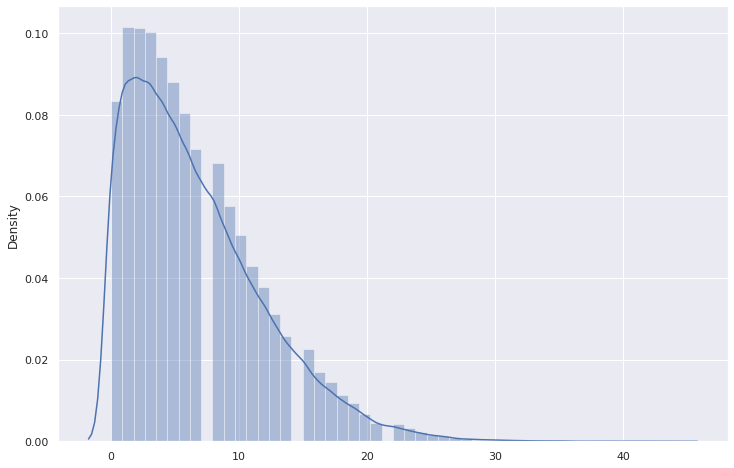

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(12, 8))

check = dd[dd['qty_periods'] == 2]

sns.distplot(check.product_intersection.values)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

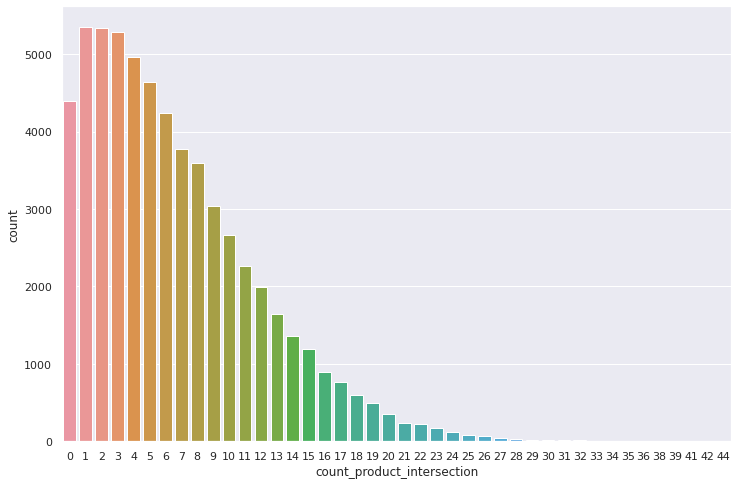

In [106]:
plt.figure(figsize=(12, 8))

sns.countplot(check.product_intersection.values)

plt.xlabel('count_product_intersection')
plt.ylabel('count')

# plt.savefig('sadfdasf.jpg')

In [107]:
product_intersection = np.arange(9, 50)
check[check['product_intersection'].isin(product_intersection)].shape[0] / dd.shape[0]

0.17121829117943738

In [134]:
check.sort_values(by=['qty_periods', 'product_intersection'], ascending=False).head(500)

,user_id,product_intersection,qty_periods,intersect_products
72964,2540509,44,2,"[3497347, 21767, 266, 202006, 14361, 58010, 19..."
67028,2135642,42,2,"[2306, 37123, 9859, 10115, 21511, 102284, 4592..."
29396,1940826,41,2,"[59909, 13449, 60042, 2321, 60692, 67220, 6773..."
93193,2721721,39,2,"[63621, 37128, 45459, 25109, 24357, 24872, 454..."
74280,2624947,38,2,"[3075072, 3075073, 3075075, 45586, 76690, 3821..."
...,...,...,...,...
15633,1118349,23,2,"[5075970, 7014915, 5075971, 1037, 7015569, 143..."
16046,1177120,23,2,"[261, 399, 6300, 43, 79410, 4141624, 4141625, ..."
16050,1177555,23,2,"[5642, 142, 84497, 45457, 2066, 17813, 84509, ..."
16219,1197167,23,2,"[36483, 24836, 14469, 24842, 138, 45459, 84000..."


In [135]:
f = [int(x) for x in res_res[res_res.Id == 1197989].Predicted.values[0].split(' ')]
g = check[check.user_id == 1197989].intersect_products.values[0]

list(set(g) - set(f))

[]

In [128]:
g

[0,
 77075,
 2325,
 46742,
 151,
 9496,
 85789,
 77099,
 7014956,
 77229,
 5478066,
 25141,
 6782778,
 7000508,
 6640702,
 6337,
 6691650,
 73411,
 62024,
 6347,
 57552,
 6640724,
 6640598,
 39770,
 6640603,
 3818084,
 94054,
 73725,
 73335,
 21757]

In [129]:
f

[151,
 6347,
 6782778,
 7014956,
 2325,
 77099,
 73335,
 85789,
 3818084,
 7000508,
 0,
 6375429,
 6640603,
 46742,
 77229,
 73725,
 6782779,
 62024,
 4276055,
 6640598,
 6337,
 73411,
 5478066,
 6640702,
 9496,
 6805276,
 13692,
 25141,
 57552,
 75606,
 75679,
 6368453,
 6640724,
 6805110,
 39770,
 73937,
 77075,
 201322,
 5045417,
 6685853,
 6338,
 73286,
 94054,
 6691650,
 7401,
 21757,
 96439,
 7330060,
 9571,
 45589]

In [ ]:
res_concat_list = []

for file in tqdm(tab_2):
  x = pd.read_csv(file)
  filter_frame = x[x['user_id'].isin(submit_user_id)]
  res_concat_list.append(filter_frame)

frame = pd.concat(res_concat_list)

NameError: ignored

In [ ]:
tab_1_orders = pd.read_csv('tab_1_orders.csv')

In [ ]:
tab_1_orders.head()

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web


In [ ]:
frame['master_parent'] = str(int(frame['master_category_id'])) + '_' + str(frame['parent_category_id'])

frame

TypeError: ignored

In [ ]:
# frame_merge = frame.merge(tab_1_orders, left_on='order_id', right_on='order_id')

In [ ]:
drop_columns = [
      'order_id',
      'line_item_id',
      'product_name',
      'product_id',
      'retailer',
      'user_id_y'
]

frame = frame.drop(columns=drop_columns)

In [ ]:
frame.sort_values(by='order_created_time')

,user_id_x,price,quantity,discount,brand_name,master_category_id,parent_category_id,order_created_time,store_id,platform
3014503,1795320,39.900002,1,4.090000,Corny,582.0,9,2020-01-01 10:20:46,255,app
3014502,1795320,149.899994,1,147.479996,Jardin,128.0,126,2020-01-01 10:20:46,255,app
3014478,1795320,28.990000,2,0.000000,Cheetos,612.0,19,2020-01-01 10:20:46,255,app
3014479,1795320,61.990002,1,0.000000,Простоквашино,29.0,20,2020-01-01 10:20:46,255,app
3014480,1795320,76.900002,2,0.000000,Parmalat,26.0,20,2020-01-01 10:20:46,255,app
...,...,...,...,...,...,...,...,...,...,...
7399466,2418239,109.889999,1,42.799999,Lay's,610.0,19,2020-09-16 22:57:36,200,app
7399468,2418239,154.990005,1,165.000000,Bibigo,643.0,99,2020-09-16 22:57:36,200,app
7399459,2418239,102.199997,1,19.160000,Лента,639.0,99,2020-09-16 22:57:36,200,app
7399464,2418239,73.690002,2,0.000000,Лента,596.0,51,2020-09-16 22:57:36,200,app


In [ ]:
from tqdm import tqdm

res_concat_first = []

for file in tqdm(first_part):
  x = pd.read_csv(file)
  filter_frame = x[x['user_id'].isin(submit_user_id)]
  res_concat_first.append(filter_frame)

100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


In [ ]:
res_first = pd.concat(res_concat_first)

xxx = res_first.groupby(['user_id'])['product_id'].value_counts()
first = xxx.to_frame().rename(columns={'product_id': 'count_id'}).reset_index()

largest_first = first.groupby(['user_id'])['product_id', 'count_id'].apply(pd.DataFrame.nlargest, n=50, columns=['count_id']).reset_index().drop(columns={'level_1'})
first_dict = largest_first[['user_id', 'product_id']].groupby(['user_id'])['product_id'].apply(list).to_dict()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
len(first_dict.keys())

14369